<a href="https://colab.research.google.com/github/SivaAkash21/Movie-Recommendation/blob/main/Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from io import StringIO

csv_data = StringIO("""title,description
Inception,"A thief who steals corporate secrets through the use of dream-sharing technology."
Interstellar,"A team of explorers travel through a wormhole in space to ensure humanity's survival."
The Dark Knight,"Batman sets out to dismantle the remaining criminal organizations that plague Gotham City."
The Prestige,"Two rival stage magicians engage in a battle to create the ultimate illusion while sacrificing everything."
Memento,"A man with short-term memory loss uses tattoos and notes to hunt for his wife’s killer."
The Matrix,"A hacker discovers that the world he lives in is a simulation and joins a rebellion."
Shutter Island,"A U.S. Marshal investigates the disappearance of a prisoner from a hospital for the criminally insane."
Fight Club,"An insomniac office worker and a soapmaker form an underground fight club that evolves into something much more."
The Truman Show,"An insurance salesman discovers his whole life is a TV show and struggles with reality."
Donnie Darko,"A troubled teenager is plagued by visions of a man in a rabbit suit who manipulates him to commit crimes."
""")

df = pd.read_csv(csv_data)
df.head()


,title,description
0,Inception,A thief who steals corporate secrets through t...
1,Interstellar,A team of explorers travel through a wormhole ...
2,The Dark Knight,Batman sets out to dismantle the remaining cri...
3,The Prestige,Two rival stage magicians engage in a battle t...
4,Memento,A man with short-term memory loss uses tattoos...


In [2]:
import pandas as pd
from io import StringIO

csv_data = StringIO("""title,description
Inception,"A thief who steals corporate secrets through the use of dream-sharing technology."
Interstellar,"A team of explorers travel through a wormhole in space to ensure humanity's survival."
The Dark Knight,"Batman sets out to dismantle the remaining criminal organizations that plague Gotham City."
The Prestige,"Two rival stage magicians engage in a battle to create the ultimate illusion while sacrificing everything."
Memento,"A man with short-term memory loss uses tattoos and notes to hunt for his wife’s killer."
The Matrix,"A hacker discovers that the world he lives in is a simulation and joins a rebellion."
Shutter Island,"A U.S. Marshal investigates the disappearance of a prisoner from a hospital for the criminally insane."
Fight Club,"An insomniac office worker and a soapmaker form an underground fight club that evolves into something much more."
The Truman Show,"An insurance salesman discovers his whole life is a TV show and struggles with reality."
Donnie Darko,"A troubled teenager is plagued by visions of a man in a rabbit suit who manipulates him to commit crimes."
""")

# Define df here
df = pd.read_csv(csv_data)
df.head()

# Check for missing values
print(df.isnull().sum())

# Remove duplicates (if any)
df.drop_duplicates(inplace=True)

# Convert all descriptions to lowercase
df['description'] = df['description'].str.lower()

title          0
description    0
dtype: int64


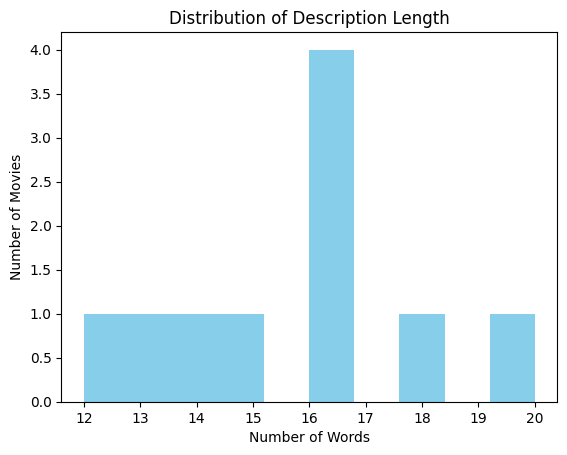

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Description length distribution
df['desc_length'] = df['description'].apply(lambda x: len(x.split()))
plt.hist(df['desc_length'], bins=10, color='skyblue')
plt.xlabel('Number of Words')
plt.ylabel('Number of Movies')
plt.title('Distribution of Description Length')
plt.show()

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization with bigrams
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(df['description'])

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

TF-IDF matrix shape: (10, 158)


In [5]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get top N recommendations
def recommend_movies(title, top_n=5):
    if title not in df['title'].values:
        return "Movie not found in the dataset."

    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    top_movies = [df['title'][i[0]] for i in sim_scores[1:top_n+1]]
    return top_movies

In [6]:
# Example recommendation
recommend_movies("Inception")

['Interstellar', 'The Dark Knight', 'The Prestige', 'Memento', 'The Matrix']

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF Vectorization with bigrams
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(df['description'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

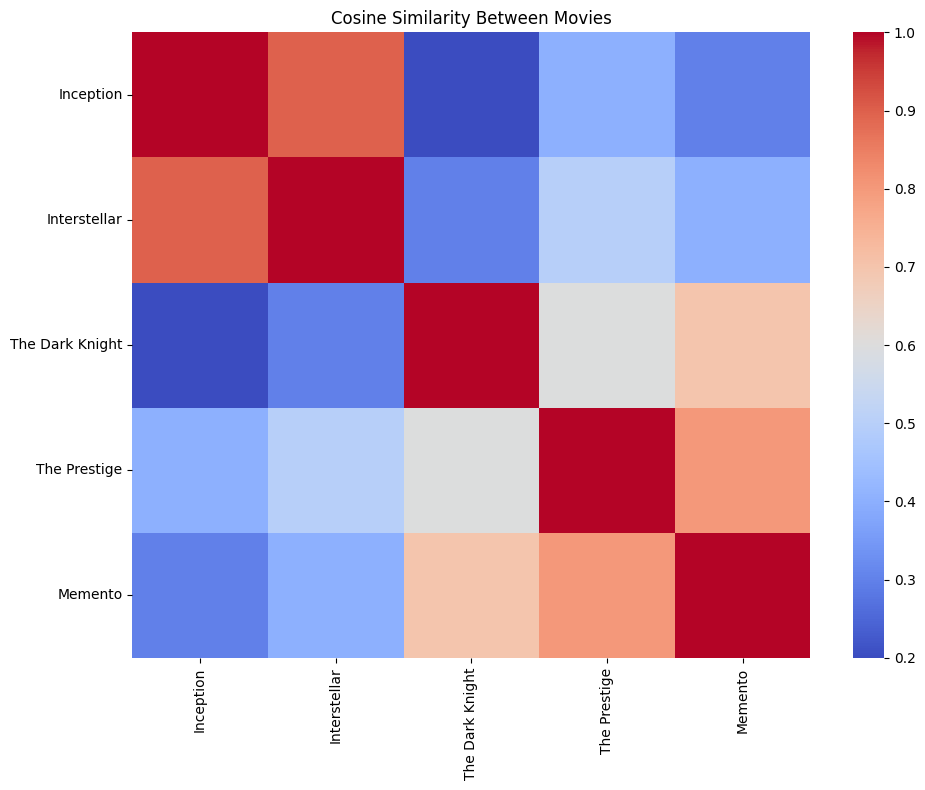

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Sample movie titles
titles = ['Inception', 'Interstellar', 'The Dark Knight', 'The Prestige', 'Memento']

# Example cosine similarity matrix (symmetric with 1s on the diagonal)
cosine_sim = np.array([
    [1.0, 0.9, 0.2, 0.4, 0.3],
    [0.9, 1.0, 0.3, 0.5, 0.4],
    [0.2, 0.3, 1.0, 0.6, 0.7],
    [0.4, 0.5, 0.6, 1.0, 0.8],
    [0.3, 0.4, 0.7, 0.8, 1.0]
])

# Create a DataFrame to simulate your movie titles
df = pd.DataFrame({'title': titles})

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim,
            xticklabels=df['title'],
            yticklabels=df['title'],
            cmap='coolwarm',
            annot=False)

plt.title("Cosine Similarity Between Movies")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
